# Task 2

Author: Roshni Sanjay Jadhav\
Company: Prodigy InfoTech

Problem Statement: Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

Importing libraries

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Importing and reading the data

In [2]:
titanic=pd.read_csv(r"C:\Users\Admin\Downloads\train (1).csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.shape

(891, 12)

In [7]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# Impute missing Age values with median age
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

# Drop Cabin column
titanic.drop('Cabin', axis=1, inplace=True)

# Impute missing Embarked values with most frequent port
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

In [24]:
# Normalize Fare using log scale
titanic['Fare'] = np.log(titanic['Fare'])

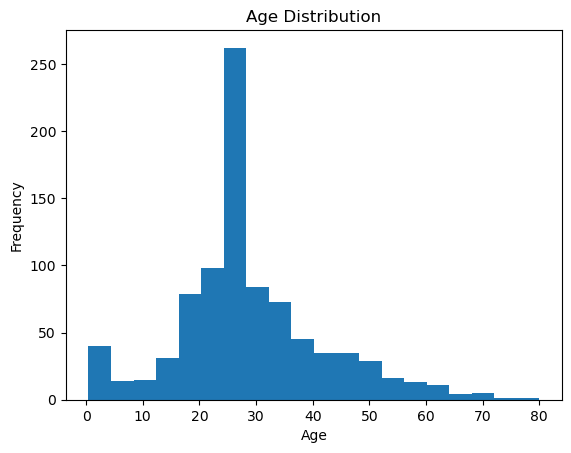

In [21]:
# Histogram of Age
plt.hist(titanic['Age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.034212 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.064910 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.339898  0.083081  0.018443   
Age             0.034212 -0.064910 -0.339898  1.000000 -0.233296 -0.172482   
SibSp          -0.057527 -0.035322  0.083081 -0.233296  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.172482  0.414838  1.000000   
Fare            0.003526  0.328132 -0.756186  0.125053  0.348557  0.360047   

                 Fare  
PassengerId  0.003526  
Survived     0.328132  
Pclass      -0.756186  
Age          0.125053  
SibSp        0.348557  
Parch        0.360047  
Fare         1.000000  


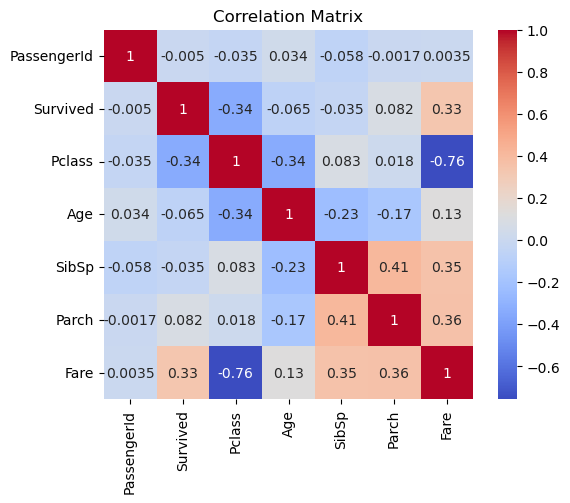

In [25]:
# Correlation matrix
corr_matrix = titanic.corr()
print(corr_matrix)

# Heatmap of correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

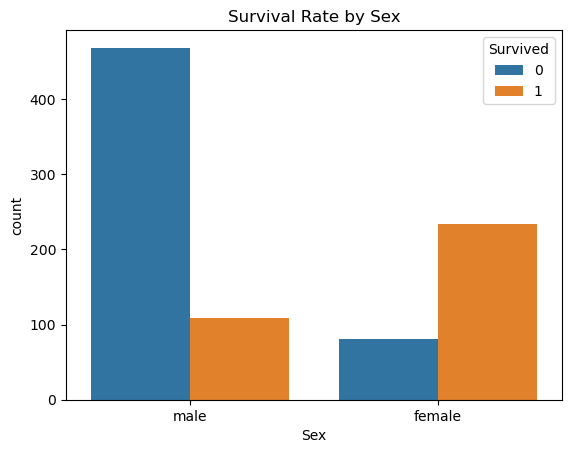

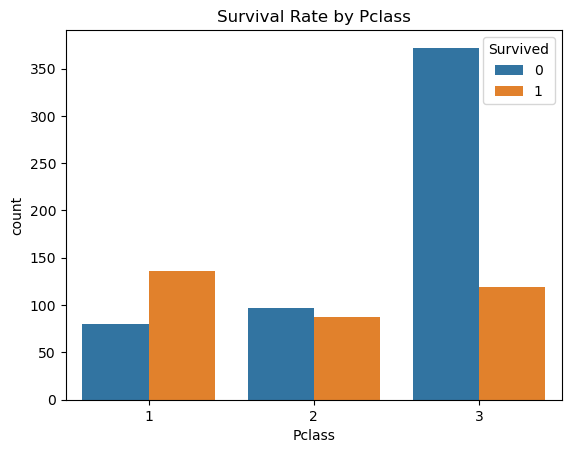

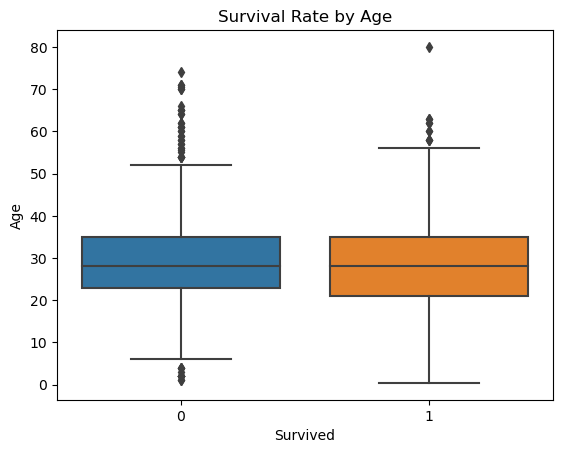

In [14]:
# Survival rate by Sex
sns.countplot(x='Sex', hue='Survived', data=titanic)
plt.title('Survival Rate by Sex')
plt.show()

# Survival rate by Pclass
sns.countplot(x='Pclass', hue='Survived', data=titanic)
plt.title('Survival Rate by Pclass')
plt.show()

# Survival rate by Age
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.title('Survival Rate by Age')
plt.show()

In [15]:
# Most common names
print(titanic['Name'].value_counts().head(10))

# Most common tickets
print(titanic['Ticket'].value_counts().head(10))

Braund, Mr. Owen Harris                            1
Boulos, Mr. Hanna                                  1
Frolicher-Stehli, Mr. Maxmillian                   1
Gilinski, Mr. Eliezer                              1
Murdlin, Mr. Joseph                                1
Rintamaki, Mr. Matti                               1
Stephenson, Mrs. Walter Bertram (Martha Eustis)    1
Elsbury, Mr. William James                         1
Bourke, Miss. Mary                                 1
Chapman, Mr. John Henry                            1
Name: Name, dtype: int64
347082          7
CA. 2343        7
1601            7
3101295         6
CA 2144         6
347088          6
S.O.C. 14879    5
382652          5
LINE            4
PC 17757        4
Name: Ticket, dtype: int64


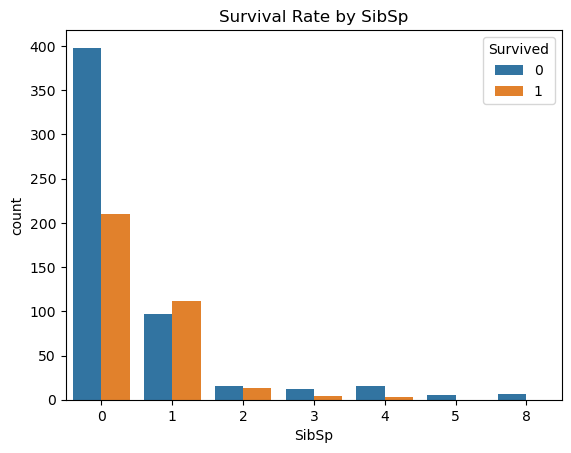

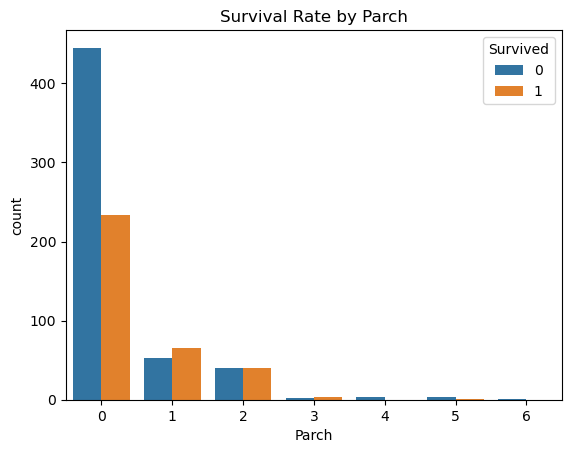

In [16]:
# Survival rate by SibSp
sns.countplot(x='SibSp', hue='Survived', data=titanic)
plt.title('Survival Rate by SibSp')
plt.show()

# Survival rate by Parch
sns.countplot(x='Parch', hue='Survived', data=titanic)
plt.title('Survival Rate by Parch')
plt.show()

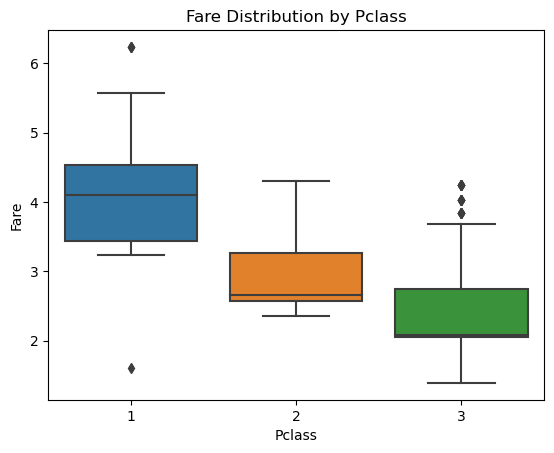

In [18]:
# Fare distribution by Pclass
sns.boxplot(x='Pclass', y='Fare', data=titanic)
plt.title('Fare Distribution by Pclass')
plt.show()

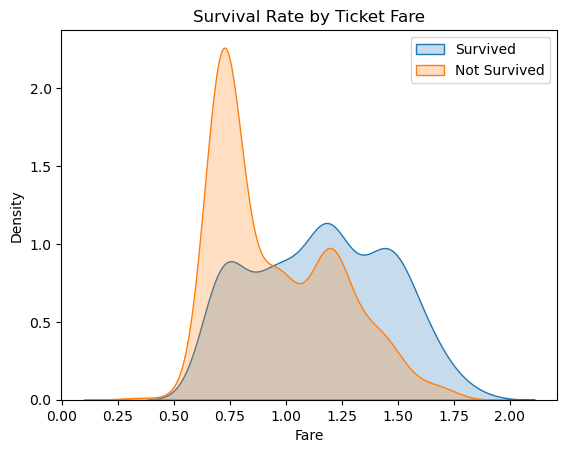

In [26]:
# Survival rate by Ticket Fare
sns.kdeplot(titanic[titanic['Survived'] == 1]['Fare'], shade=True, label='Survived')
sns.kdeplot(titanic[titanic['Survived'] == 0]['Fare'], shade=True, label='Not Survived')
plt.title('Survival Rate by Ticket Fare')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend()
plt.show()